In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


### Problem 1: Diamonds Dataset

In [3]:
# Load the data from diamonds.txt
diamonds = pd.read_csv('diamonds.txt', sep='\t')

# Add new columns for natural logarithms of carat and price
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

# Display the first 5 rows of the DataFrame
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


In [4]:
# Create X1_num (2D array with ln_carat)
X1_num = diamonds[['ln_carat']].values

# Create X1_cat (2D array with cut, color, and clarity)
X1_cat = diamonds[['cut', 'color', 'clarity']].values

# Create y1 (1D array with ln_price)
y1 = diamonds['ln_price'].values

# Print shapes with left-aligned tuples
print(f"Numerical Feature Array Shape:   {X1_num.shape}")
print(f"Categorical Feature Array Shape: {X1_cat.shape}")
print(f"Label Array Shape:               {y1.shape}")


Numerical Feature Array Shape:   (53940, 1)
Categorical Feature Array Shape: (53940, 3)
Label Array Shape:               (53940,)


In [5]:
# Create and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X1_cat)

# Transform the categorical features
X1_enc = encoder.transform(X1_cat)

# Print the shape of X1_enc
print(f"Encoded Feature Array Shape: {X1_enc.shape}")

# Combine numerical and encoded categorical features
X1 = np.hstack((X1_num, X1_enc))

# Print the shape of X1
print(f"Feature Array Shape: {X1.shape}")



Encoded Feature Array Shape: (53940, 20)
Feature Array Shape: (53940, 21)


In [6]:
# Split data into training and holdout sets (80/20 split)
X1_train, X1_hold, y1_train, y1_hold = train_test_split(X1, y1, test_size=0.2, random_state=1)

# Split holdout data into validation and test sets (50/50 split)
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_hold, y1_hold, test_size=0.5, random_state=1)

# Print shapes with left-aligned tuples
print(f"Training Features Shape:   {X1_train.shape}")
print(f"Validation Features Shape: {X1_valid.shape}")
print(f"Test Features Shape:       {X1_test.shape}")


Training Features Shape:   (43152, 21)
Validation Features Shape: (5394, 21)
Test Features Shape:       (5394, 21)


### Linear Regression Model with One Feature

In [7]:
# Create a linear regression model
dia_mod_1 = LinearRegression()

# Fit the model to the training data using only the first column
dia_mod_1.fit(X1_train[:, 0].reshape(-1, 1), y1_train)

# Calculate r-squared values for training and validation sets
train_r2 = dia_mod_1.score(X1_train[:, 0].reshape(-1, 1), y1_train)
valid_r2 = dia_mod_1.score(X1_valid[:, 0].reshape(-1, 1), y1_valid)

# Print the results with left-aligned scores
print(f"Training r-Squared\t: {train_r2:.4f}")
print(f"Validation r-Squared\t: {valid_r2:.4f}")


Training r-Squared	: 0.9330
Validation r-Squared	: 0.9348


### Linear Regression Model with Several Features

In [8]:
# Create a linear regression model
dia_mod_2 = LinearRegression()

# Fit the model to the training data using all features
dia_mod_2.fit(X1_train, y1_train)

# Calculate r-squared values for training and validation sets
train_r2 = dia_mod_2.score(X1_train, y1_train)
valid_r2 = dia_mod_2.score(X1_valid, y1_valid)

# Print the results with left-aligned scores
print(f"Training r-Squared:   {train_r2:.4f}")
print(f"Validation r-Squared: {valid_r2:.4f}")


# Score the model dia_mod_2 using the test set
test_r2 = dia_mod_2.score(X1_test, y1_test)

# Print the test r-squared
print(f"\nTesting r-Squared:    {test_r2:.4f}")


Training r-Squared:   0.9825
Validation r-Squared: 0.9834

Testing r-Squared:    0.9825


### Problem 2: Census Dataset

In [9]:
# Load the census data from the tab-delimited file
census = pd.read_csv('census.txt', sep='\t')

# Display the first 10 rows of the DataFrame
census.head(10)


,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
# Print the shape of the census DataFrame
print("Shape of the census DataFrame:")
print(census.shape)

print("\nDistribution of values in the 'salary' column:")
print(census['salary'].value_counts())

# Prepare the data
# Separate features and target
X = census.drop('salary', axis=1)
y = census['salary']

# Encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("\nShapes after splitting:")
print(f"X_train: {X_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"X_test: {X_test.shape}")


Shape of the census DataFrame:
(32561, 15)

Distribution of values in the 'salary' column:
salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

Shapes after splitting:
X_train: (19536, 100)
X_valid: (6512, 100)
X_test: (6513, 100)


### Prepare the Data

In [11]:
# Separate numerical and categorical features
numerical_features = ['age', 'fnlwgt', 'educ_num', 'capital_gain', 'capital_loss', 'hrs_per_week']
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Create arrays
X2_num = census[numerical_features].values
X2_cat = census[categorical_features].values
y2 = census['salary'].values

# Print shapes
print("Numerical Feature Array Shape:   ", X2_num.shape)
print("Categorical Feature Array Shape: ", X2_cat.shape)
print("Label Array Shape:               ", y2.shape)


Numerical Feature Array Shape:    (32561, 6)
Categorical Feature Array Shape:  (32561, 8)
Label Array Shape:                (32561,)


In [12]:
# Create and fit OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X2_cat)

# Transform categorical features
X2_enc = encoder.transform(X2_cat)

print("Encoded Feature Array Shape:", X2_enc.shape)


# Combine numerical and encoded categorical features
X2 = np.hstack((X2_num, X2_enc))

print("\nFeature Array Shape:", X2.shape)


Encoded Feature Array Shape: (32561, 102)

Feature Array Shape: (32561, 108)


In [13]:
# Split data into training and holdout sets (70/30 split)
X2_train, X2_hold, y2_train, y2_hold = train_test_split(X2, y2, test_size=0.3, random_state=1, stratify=y2)

# Split holdout data into validation and test sets (50/50 split)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_hold, y2_hold, test_size=0.5, random_state=1, stratify=y2_hold)

# Print shapes
print("Training Features Shape:  ", X2_train.shape)
print("Validation Features Shape:", X2_valid.shape)
print("Test Features Shape:      ", X2_test.shape)


Training Features Shape:   (22792, 108)
Validation Features Shape: (4884, 108)
Test Features Shape:       (4885, 108)


### Logistic Regression Model

In [24]:
# Create logistic regression model
#lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none')
lr_mod = LogisticRegression(solver='lbfgs', C=10e10, penalty=None)

# Fit model to training data
lr_mod.fit(X2_train, y2_train)

# Calculate training and validation accuracy
train_accuracy = lr_mod.score(X2_train, y2_train)
valid_accuracy = lr_mod.score(X2_valid, y2_valid)

# Print accuracy scores
print(f"Training Accuracy:   {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")


c:\Users\samue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Training Accuracy:   0.7966
Validation Accuracy: 0.7957


c:\Users\samue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Models

In [15]:
# Create empty lists to store accuracy scores
dt_train_acc = []
dt_valid_acc = []

# Create range variable for max_depth values
depth_range = range(2, 31)

# Loop over depth_range values
for depth in depth_range:
    # Set random seed
    np.random.seed(1)
    
    # Create decision tree model
    temp_tree = DecisionTreeClassifier(max_depth=depth)
    
    # Fit model to training data
    temp_tree.fit(X2_train, y2_train)
    
    # Calculate and append training and validation accuracies
    dt_train_acc.append(temp_tree.score(X2_train, y2_train))
    dt_valid_acc.append(temp_tree.score(X2_valid, y2_valid))

# Find index of maximum validation accuracy
dt_idx = np.argmax(dt_valid_acc)

# Determine optimal max_depth value
dt_opt_depth = depth_range[dt_idx]

# Get training and validation accuracies for optimal model
opt_train_acc = dt_train_acc[dt_idx]
opt_valid_acc = dt_valid_acc[dt_idx]

# Display results
print(f"Optimal value for max_depth\t\t: {dt_opt_depth:<4}")
print(f"Training Accuracy for Optimal Model\t: {opt_train_acc:.4f}")
print(f"Validation Accuracy for Optimal Model\t: {opt_valid_acc:.4f}")


Optimal value for max_depth		: 6   
Training Accuracy for Optimal Model	: 0.8585
Validation Accuracy for Optimal Model	: 0.8565


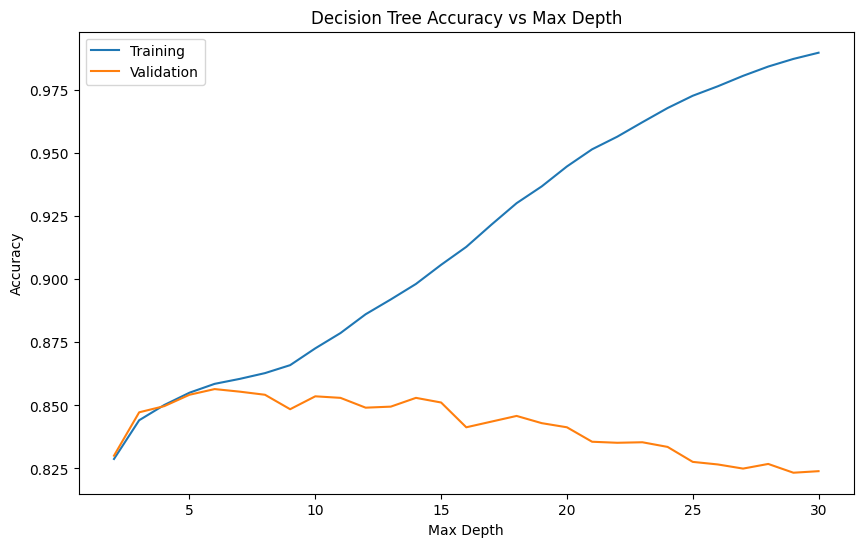

In [16]:
# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')

# Add legend
plt.legend()

# Display the plot
plt.show()


### Random Forest Models

In [17]:
# Create empty lists for storing accuracy scores
rf_train_acc = []
rf_valid_acc = []

# Loop over the values in depth_range
for depth in depth_range:
    # Set random seed
    np.random.seed(1)
    
    # Create and fit random forest model
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100)
    temp_forest.fit(X2_train, y2_train)
    
    # Calculate and append training and validation accuracies
    rf_train_acc.append(temp_forest.score(X2_train, y2_train))
    rf_valid_acc.append(temp_forest.score(X2_valid, y2_valid))

# Find index of maximum validation accuracy
rf_idx = np.argmax(rf_valid_acc)

# Determine optimal max_depth value
rf_opt_depth = depth_range[rf_idx]

# Get training and validation accuracies for optimal model
opt_rf_train_acc = rf_train_acc[rf_idx]
opt_rf_valid_acc = rf_valid_acc[rf_idx]

# Display results
print(f"Optimal value for max_depth\t\t: {rf_opt_depth:<4}")
print(f"Training Accuracy for Optimal Model\t: {opt_rf_train_acc:.4f}")
print(f"Validation Accuracy for Optimal Model\t: {opt_rf_valid_acc:.4f}")


Optimal value for max_depth		: 19  
Training Accuracy for Optimal Model	: 0.9192
Validation Accuracy for Optimal Model	: 0.8643


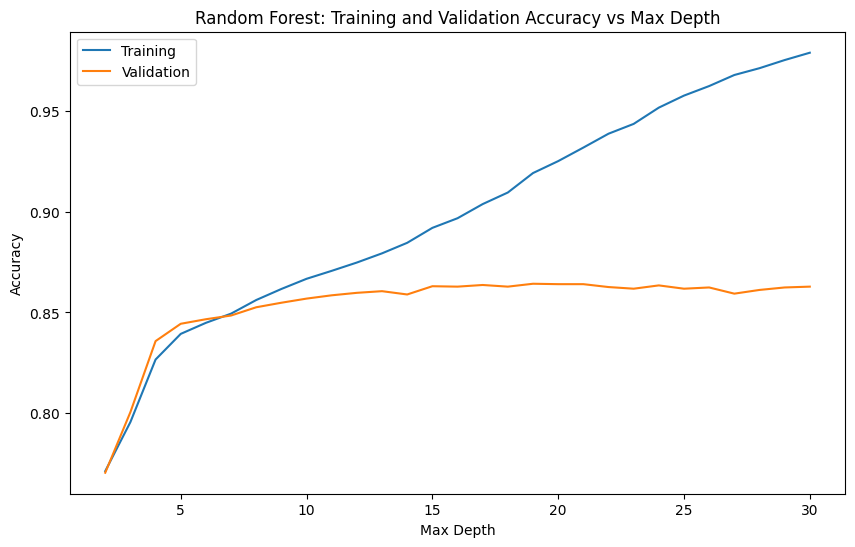

In [18]:
# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot training and validation accuracies
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')

# Set labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Training and Validation Accuracy vs Max Depth')

# Add legend
plt.legend()

# Display the plot
plt.show()


### Evaluate Final Mode

In [19]:
# Set random seed for reproducibility (for Random Forest)
np.random.seed(1)

# Recreate the best model (Random Forest with optimal max_depth)
final_model = RandomForestClassifier(max_depth=rf_opt_depth, random_state=1)

# Fit the model to the training set
final_model.fit(X2_train, y2_train)

# Calculate accuracies
train_accuracy = final_model.score(X2_train, y2_train)
valid_accuracy = final_model.score(X2_valid, y2_valid)
test_accuracy = final_model.score(X2_test, y2_test)

# Print results
print(f"Training Accuracy for Final Model\t: {train_accuracy:.4f}")
print(f"Validation Accuracy for Final Model\t: {valid_accuracy:.4f}")
print(f"Testing Accuracy for Final Model\t: {test_accuracy:.4f}")


Training Accuracy for Final Model	: 0.9192
Validation Accuracy for Final Model	: 0.8643
Testing Accuracy for Final Model	: 0.8624


In [20]:
# Generate predictions for the test set
test_pred = final_model.predict(X2_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y2_test, test_pred)

# Convert confusion matrix to DataFrame with labels
conf_matrix_df = pd.DataFrame(
    conf_matrix, 
    index=['<=50K', '>50K'],
    columns=['<=50K', '>50K']
)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)
print("\n")

# Generate and print classification report
print("Classification Report:")
print(classification_report(y2_test, test_pred))


Confusion Matrix:
       <=50K  >50K
<=50K   3505   204
>50K     468   708


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      3709
        >50K       0.78      0.60      0.68      1176

    accuracy                           0.86      4885
   macro avg       0.83      0.77      0.80      4885
weighted avg       0.86      0.86      0.86      4885

